In [3]:
import csv

In [4]:
import pandas as pd

In [24]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from pandas.api.types import CategoricalDtype
import numpy as np 
import pickle


import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
df = pd.read_csv('output.csv')


In [6]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1,2022-05-01 00:01:28,2022-05-01 00:27:47,N,1.0,181,107,1.0,8.10,25.5,3.25,0.5,8.85,0.0,NaN,0.3,38.40,1.0,1.0,2.75
1,2,2022-05-01 00:54:45,2022-05-01 01:22:01,N,1.0,119,168,2.0,16.99,47.5,0.50,0.5,0.00,0.0,NaN,0.3,48.80,2.0,1.0,0.00
2,2,2022-05-01 00:11:22,2022-05-01 00:11:56,N,5.0,255,255,3.0,0.16,60.0,0.00,0.0,10.00,0.0,NaN,0.3,70.30,1.0,2.0,0.00
3,2,2022-05-01 00:21:09,2022-05-01 00:48:41,N,1.0,223,50,1.0,5.66,22.0,0.50,0.5,5.21,0.0,NaN,0.3,31.26,1.0,1.0,2.75
4,2,2022-04-30 23:21:10,2022-04-30 23:38:37,N,1.0,75,153,1.0,7.52,22.5,0.50,0.5,0.00,0.0,NaN,0.3,23.80,1.0,1.0,0.00


In [7]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,76891.000000,66433.000000,76891.000000,76891.000000,66433.000000,76891.000000,76891.000000,76891.000000,76891.000000,76891.000000,76891.000000,0.0,76891.000000,76891.000000,66433.000000,66430.000000,66433.000000
mean,1.860543,1.218235,100.478079,138.448830,1.279635,118.614916,15.537695,0.336499,0.407929,2.126048,0.283878,NaN,0.297402,19.664402,1.369184,1.045702,0.739211
std,0.346425,1.104788,64.494962,76.519444,0.903108,3899.610103,13.537154,0.643090,0.196376,3.431635,1.477606,NaN,0.034079,15.803459,0.498030,0.208840,1.219352
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-60.000000,-4.500000,-0.500000,-2.080000,0.000000,NaN,-0.300000,-60.300000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,65.000000,74.000000,1.000000,1.190000,8.000000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,10.300000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,2.110000,11.500000,0.000000,0.500000,1.550000,0.000000,NaN,0.300000,15.300000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,134.000000,217.000000,1.000000,3.950000,18.920000,0.500000,0.500000,3.030000,0.000000,NaN,0.300000,23.730000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,360068.140000,595.500000,4.500000,0.500000,333.330000,57.700000,NaN,0.300000,596.300000,4.000000,2.000000,2.750000


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df['VendorID'].value_counts()

VendorID
2    66168
1    10723
Name: count, dtype: int64

In [10]:
df['VendorID'] = df['VendorID'].astype('category')


In [11]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime']) 
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime']) 

In [12]:
print('Earliest pickup datetime:', df['lpep_pickup_datetime'].min())
print('Latest pickup datetime:', df['lpep_pickup_datetime'].max())

Earliest pickup datetime: 2022-04-08 12:10:29
Latest pickup datetime: 2022-05-31 23:59:09


In [13]:
print('Earliest dropoff datetime:', df['lpep_dropoff_datetime'].min())
print('Latest dropoff datetime:', df['lpep_dropoff_datetime'].max())

Earliest dropoff datetime: 2022-04-08 12:17:49
Latest dropoff datetime: 2022-06-01 15:04:09


In [19]:
print('number of records with dropoff times in 2022:', df[(df['lpep_dropoff_datetime'] >= '2022-01-01 02:00:00') & (df['lpep_dropoff_datetime'] <= '2022-06-01 15:04:09')].shape[0])


number of records with dropoff times in 2022: 76891


In [20]:
df['trip_date'] = df['lpep_pickup_datetime'].dt.date
df['trip_date'] = df['trip_date'].astype('category')

In [25]:
cat_strip_dow_name = CategoricalDtype(
    ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
    ordered=True
)
df['trip_dow_name'] = df['lpep_pickup_datetime'].dt.day_name()
df['trip_dow_name'] = df['trip_dow_name'].astype(cat_strip_dow_name)

In [26]:
df['trip_hour'] = df['lpep_pickup_datetime'].dt.hour
df['trip_hour'] = df['trip_hour'].astype('category')


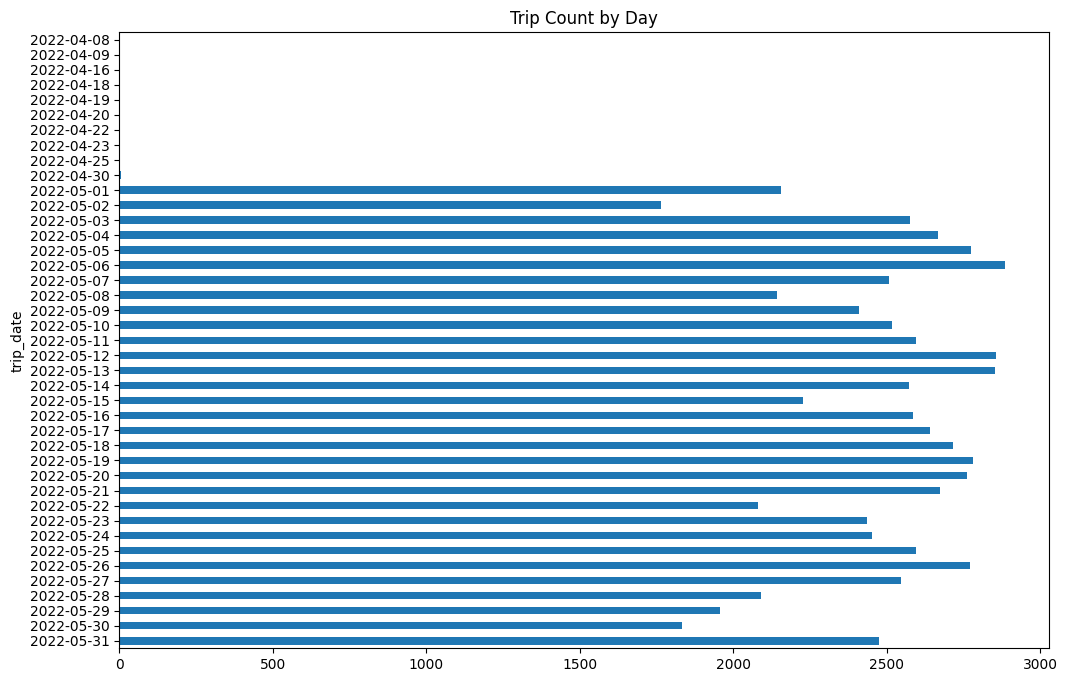

In [28]:
plt.figure(figsize = (12,8))

(
    df['trip_date']
    .value_counts()
    .sort_index(ascending=False)
    .plot(kind='barh', title='Trip Count by Day')
)
plt.show()

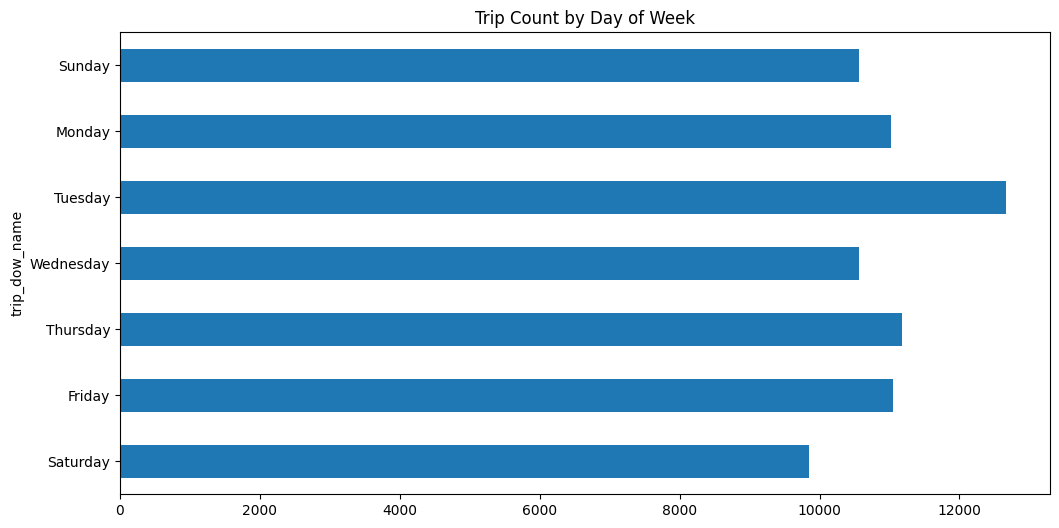

In [29]:
plt.figure(figsize = (12,6))
(
    df['trip_dow_name']
    .value_counts()
    .sort_index(ascending=False)
    .plot(kind='barh', title='Trip Count by Day of Week')
)
plt.show()